# Digital DNA - python
## Getting Started
This package provides a set of utilities and algorithms for online social bot detection based on the paper [Social Fingerprinting: Detection of Spambot Groups Through DNA-Inspired Behavioral Modeling](https://ieeexplore.ieee.org/document/7876716)

### import libraries
Let's start with the import libraries

In [1]:
import digitaldna as ddna
import csv
from digitaldna import Verbosity
from digitaldna import SequencePlots
import pandas as pd
import numpy as np
from digitaldna.lcs import LongestCommonSubsequence
from os import listdir
import os
from matplotlib import pyplot as plt
import time
from digitaldna import SequencePlots

### Sequence your first Digital DNA from Twitter. 
You can sequence from a JSON containing the timeline

In [2]:
from digitaldna import TwitterDDNASequencer

filepath = os.path.join(os.getcwd(), "timelines.json")
model = TwitterDDNASequencer(input_file=filepath, alphabet='b3_type')
data = model.fit_transform()

In [3]:

df = pd.DataFrame({"user_id": data[:, 0],
              "dna": data[:, 1]})
df

,user_id,dna
0,48062712,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCC...
1,2479063608,AAAAATCTACTAAATATTTTAAATCAAACTTCCAACTAACTAATTC...
2,22834067,ACACCCAAAAACACCCCACAACAAACAAAAAACCACACACAACAAA...
3,4289404586,AAAAAAAAACAAAACCAACCCCACAACCCCAAAAAACTCCAACAAA...
4,615597661,AAAAAAAAAAACAAACCAAAACAAAAAAAAAAAAAATAATAAATTA...
5,1135017996,ACACAAATTTACTAAAATTTCAACTTCATATTTTTATCAAAATAAA...


Or a previously DNA sequenced timeline

In [19]:
filepath = os.path.join(os.getcwd(), "italian_retweets_users_sequences_new.csv")
df = pd.read_csv(filepath)
df

,user_id,tweet_count,dna,bot,retweets(%)
0,1123481,3208,AACCCCCCACAACCCCCCCCCCACACATCAATCCCACCCCCAACCA...,0,62
1,3500831,3214,CCTTACCCCTACTACTTCAAACCAAACAAAACAACCCATCTCCCTT...,0,27
2,14871003,3193,CCTACATACCCCCTCCAAACCACCCACACCACAACCCCCCCCCCCC...,0,66
3,14906561,3204,ACCCCACCCCCCCAAAAAAAACCCCCCCCAAAAACCCCCAACCCCA...,0,58
4,17880873,3212,CCCCTCCTCCCTTCCCTCTTTCCACTCCCTCTCCTTTCCTTTCCCC...,0,44
5,19017283,3170,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,1,100
6,20432064,3195,TCTTTAACAACCACACAACCCCAAAAAAAATCCCCCAAAACACACC...,0,67
7,22009205,3209,TTTTATAATAATCCCCTCCATATCTCCTCTTTTCATATCTTTTTTC...,0,20
8,25851958,3204,TTACACTTACAACCACTCTACATTCCCACTTTTATTACCCACCTTA...,0,45
9,32604352,2463,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCC...,1,79


### Plot sequence distribution

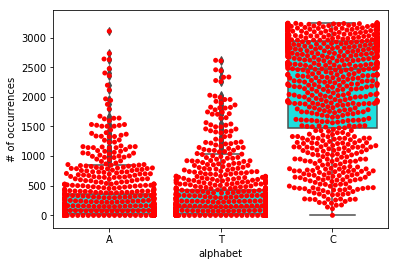

In [5]:
plotter = SequencePlots(alphabet='b3_type')
plotter.plot_alphabet_distribution(df["dna"])

## LCS and bot detection analysis
Thanks to the `digitaldna` we can make a bot detection thanks to the sequence behaviour of Twitter actions with just a few simple commands

In [6]:
est = LongestCommonSubsequence()
y = est.fit_predict(df["dna"])
df["bot"] = y

fitting...
finding cut...
predicting...
done.


In [7]:
df[:10]

,user_id,tweet_count,dna,bot,retweets(%)
0,1123481,3208,AACCCCCCACAACCCCCCCCCCACACATCAATCCCACCCCCAACCA...,False,62
1,3500831,3214,CCTTACCCCTACTACTTCAAACCAAACAAAACAACCCATCTCCCTT...,False,27
2,14871003,3193,CCTACATACCCCCTCCAAACCACCCACACCACAACCCCCCCCCCCC...,False,66
3,14906561,3204,ACCCCACCCCCCCAAAAAAAACCCCCCCCAAAAACCCCCAACCCCA...,False,58
4,17880873,3212,CCCCTCCTCCCTTCCCTCTTTCCACTCCCTCTCCTTTCCTTTCCCC...,False,44
5,19017283,3170,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,True,100
6,20432064,3195,TCTTTAACAACCACACAACCCCAAAAAAAATCCCCCAAAACACACC...,False,67
7,22009205,3209,TTTTATAATAATCCCCTCCATATCTCCTCTTTTCATATCTTTTTTC...,False,20
8,25851958,3204,TTACACTTACAACCACTCTACATTCCCACTTTTATTACCCACCTTA...,False,45
9,32604352,2463,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCC...,False,79


and plot the linear and logarithmic LCS with its threshold that separates bots from human

<module 'matplotlib.pyplot' from '/Users/salvob/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

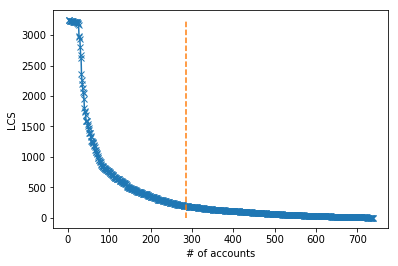

In [8]:
est.plot_LCS()

<module 'matplotlib.pyplot' from '/Users/salvob/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

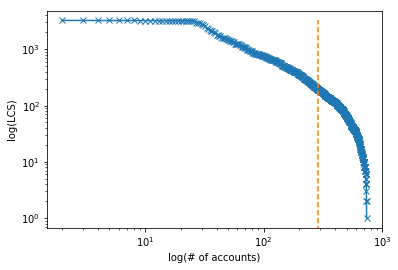

In [9]:
est.plot_LCS_log()

## Entropy plot
### Intrasequence plot

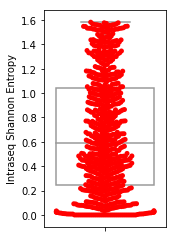

In [10]:
plotter = SequencePlots(alphabet='b3_type')
intra_seq = plotter.plot_intrasequence_entropy(df["dna"])

### Intersequence plot

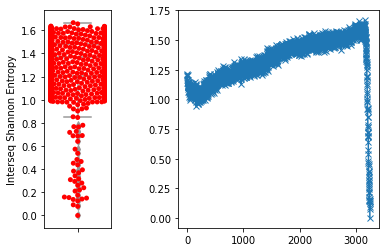

In [11]:
inter_seq = plotter.plot_intersequence_entropy(df["dna"])

### Plot Sequence Color
How the datafram is distributed

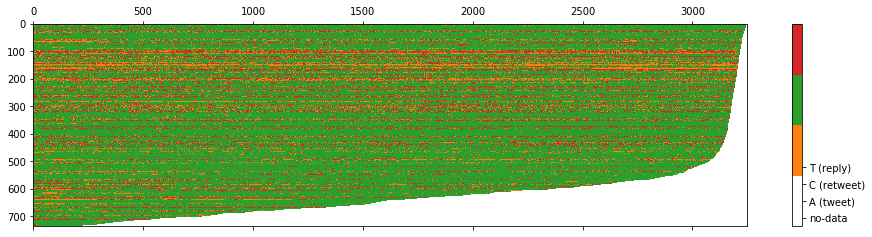

In [12]:
plotter.plot_sequences_color(df["dna"])